# Learn Keras 

## source: [11.Keras Tutorial : Fine-tuning using pre-trained models](https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/)

(190401)

Note: 
- Image classification using different pre-trained models  - this is about not tranfer learning and no fiune tuning 
- Transfer Learning is about using the features extraction layers and building custom top layers (FC part - few denses with softmax or sigmoid in the end). This is implemented as passing the new train data to stripped pretrained layer getting the feature representation e.g. `7x7x32` which is used as input to new network 
see [10.Keras Tutorial : Transfer Learning using pre-trained models](https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/)

- **Fine-tuning** (*this page*) is similar to transfer learning but training some last layers as altogether with custom final layers  - it uses the features extraction layers then freezes first layers and keep trainable last few layers and then adding custom top layers (FC part - few denses with softmax or sigmoid in the end). 


## ImageNet

### [ImageNet](http://image-net.org/explore.php) 

<img src='image_for_learing_keras_6.png' align = 'left' width = '600px' height= '600px'>

<div style="clear:left"></div> 

ImageNet is based upon WordNet which groups words into sets of synonyms (synsets). 
<br>Each synset is assigned a <font color='blue' size= '4'>**“wnid”** </font> ( Wordnet ID ). 
<br>Note that in a general category, there can be many subcategories and each of them will belong to a different synset. 
<br>For example Working Dog ( sysnet = n02103406 ), Guide Dog ( sysnet = n02109150 ), and Police Dog ( synset = n02106854 ) are three different synsets.

The wnid’s of the 3 object classes we are considering are given below

- n07734017 -> Tomato
- n07735510 -> Pumpkin
- n07756951 -> WaterMelon

OT_Comment: we consider those 3 classes as sample of training the classes that are not considered at training the source (pretrained) model. In general you need to use all classes you want to classify. i.e. You cannot just add three custom classes and expect that model starts to classify 1003 instead of 1000 classes. 

**If you want to add 1 new class to 1000 existing classes of pretrained model you need to train on 1001 class**.


## Download and prepare Data


In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import os

### Create directories for classes


In [25]:
# target_classes= {
#     'tomato': 'n07756951',
#     'watermelon': 'n07734017',
#     'pumpkin': 'n07735510',
# }

In [26]:
def create_dir(path_dir):    
    '''
    path_dir - str e.g. "./content/train/ships"
    '''    
    path_steps=  path_dir.split('/')
    for l in range (1,len(path_steps)):
        parent_dir = '/'.join(path_steps[:l+1])
        if not os.path.exists(parent_dir):
            os.makedirs(parent_dir)  
    
# create_dir("./test/content/train/ships/test/test")

In [27]:
def create_all_dirs(target_classes):
    for c in target_classes:
        create_dir('./content/train/{}'.format(c))
        create_dir('./content/validation/{}'.format(c))
# create_all_dirs(target_classes)

### Get images urls for every class 


In [30]:
def get_images_urls_by_wnid(wnid):
    '''wnid - str e.g. "n04194289"
    '''
    page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid={}".format(wnid))    
    soup = BeautifulSoup(page.content, 'html.parser') # each url on a different line
    str_soup = str(soup) # convert soup to string so it can be split
    split_urls = str_soup.split('\r\n') # split so each url is a different possition on a list
    print ('Available {:,} urls for {}'.format(len(split_urls), wnid)  )
    return split_urls

def get_all_classes_images_urls(target_classes):    
    return {c : get_images_urls_by_wnid(wnid) for c, wnid in target_classes.items()}
        
                
# images_urls= get_all_classes_images_urls(target_classes)


Available 1,354 urls for n07756951
Available 1,233 urls for n07734017
Available 1,542 urls for n07735510


### Get images for all classes


In [36]:
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    # return the image
    return image


def get_images(input_list, start, amount, path='/content/train/ships'):
    progress= 0
    nloaded = 0 
    while nloaded < amount:            
        try:
            img = url_to_image(input_list[progress])
            if (len(img.shape)==3) and (int(img.mean())!=253):  # This avoids images that are no longer available - mostly white
                save_path = '{}/img{}.jpg'.format(path, progress) #create a name of each image
                cv2.imwrite(save_path,img)
                nloaded+=1
                print ('{}. Saved to: {}'.format(nloaded, save_path))
            else: 
                print ('Image shape is wrong or image is no longer avaialble')
        except Exception as e: 
            print (e)
        progress+=1
        
def get_all_classes_images(target_classes, ntrain=100, nvalid=50):
    images_urls= get_all_classes_images_urls(target_classes)    
    for c in target_classes:        
        images_urls[c]
        get_images(images_urls[c],0, ntrain,path='./content/train/{}'.format(c))
        get_images(images_urls[c], ntrain, nvalid,path='./content/validation/{}'.format(c))

# get_all_classes_images(target_classes)       


In [ ]:
target_classes= {
    'tomato': 'n07734017',
    'watermelon': 'n07756951',
    'pumpkin': 'n07735510',
}
create_all_dirs(target_classes)
get_all_classes_images(target_classes, ntrain=100, nvalid=50)


Available 1,354 urls for n07756951
Available 1,233 urls for n07734017
Available 1,542 urls for n07735510
1. Saved to: ./content/train/tomato/img0.jpg
HTTP Error 403: Forbidden
2. Saved to: ./content/train/tomato/img2.jpg
Image shape is wrong or image is no longer avaialble
3. Saved to: ./content/train/tomato/img4.jpg
4. Saved to: ./content/train/tomato/img5.jpg
5. Saved to: ./content/train/tomato/img6.jpg
6. Saved to: ./content/train/tomato/img7.jpg
Image shape is wrong or image is no longer avaialble
7. Saved to: ./content/train/tomato/img9.jpg
8. Saved to: ./content/train/tomato/img10.jpg
9. Saved to: ./content/train/tomato/img11.jpg
10. Saved to: ./content/train/tomato/img12.jpg
11. Saved to: ./content/train/tomato/img13.jpg
12. Saved to: ./content/train/tomato/img14.jpg
13. Saved to: ./content/train/tomato/img15.jpg
14. Saved to: ./content/train/tomato/img16.jpg
15. Saved to: ./content/train/tomato/img17.jpg
Image shape is wrong or image is no longer avaialble
16. Saved to: ./conte

Image shape is wrong or image is no longer avaialble
32. Saved to: ./content/validation/tomato/img42.jpg
33. Saved to: ./content/validation/tomato/img43.jpg
34. Saved to: ./content/validation/tomato/img44.jpg
35. Saved to: ./content/validation/tomato/img45.jpg
36. Saved to: ./content/validation/tomato/img46.jpg
37. Saved to: ./content/validation/tomato/img47.jpg
38. Saved to: ./content/validation/tomato/img48.jpg
39. Saved to: ./content/validation/tomato/img49.jpg
40. Saved to: ./content/validation/tomato/img50.jpg
41. Saved to: ./content/validation/tomato/img51.jpg
42. Saved to: ./content/validation/tomato/img52.jpg
43. Saved to: ./content/validation/tomato/img53.jpg
44. Saved to: ./content/validation/tomato/img54.jpg
45. Saved to: ./content/validation/tomato/img55.jpg
46. Saved to: ./content/validation/tomato/img56.jpg
47. Saved to: ./content/validation/tomato/img57.jpg
48. Saved to: ./content/validation/tomato/img58.jpg
49. Saved to: ./content/validation/tomato/img59.jpg
50. Saved t

17. Saved to: ./content/validation/watermelon/img18.jpg
18. Saved to: ./content/validation/watermelon/img19.jpg
Image shape is wrong or image is no longer avaialble
Image shape is wrong or image is no longer avaialble
19. Saved to: ./content/validation/watermelon/img22.jpg
20. Saved to: ./content/validation/watermelon/img23.jpg
21. Saved to: ./content/validation/watermelon/img24.jpg
Image shape is wrong or image is no longer avaialble
22. Saved to: ./content/validation/watermelon/img26.jpg
Image shape is wrong or image is no longer avaialble
23. Saved to: ./content/validation/watermelon/img28.jpg
24. Saved to: ./content/validation/watermelon/img29.jpg
Image shape is wrong or image is no longer avaialble
25. Saved to: ./content/validation/watermelon/img31.jpg
Image shape is wrong or image is no longer avaialble
Image shape is wrong or image is no longer avaialble
26. Saved to: ./content/validation/watermelon/img34.jpg
27. Saved to: ./content/validation/watermelon/img35.jpg
28. Saved to:

## Fine-tuning in Keras

We will use the VGG model for fine-tuning.

### Load the pre-trained model

First, we will load a VGG model without the top layer ( which consists of fully connected layers ).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

In [4]:
train_dir = './content/train'
validation_dir = './content/validation'
image_size = 224

In [5]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 14s 0us/step


## Freeze the required layers

In Keras, each layer has a parameter called `trainable`. 

For freezing the weights of a particular layer, we should set this parameter to False, indicating that this layer should not be trained. That’s it! We go over each layer and select which layers we want to train.

In [6]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
    
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x133365b00> False
<keras.layers.convolutional.Conv2D object at 0x133365e80> False
<keras.layers.convolutional.Conv2D object at 0x13343a048> False
<keras.layers.pooling.MaxPooling2D object at 0x133365e48> False
<keras.layers.convolutional.Conv2D object at 0x1004b3550> False
<keras.layers.convolutional.Conv2D object at 0x131090ef0> False
<keras.layers.pooling.MaxPooling2D object at 0x1333bb4a8> False
<keras.layers.convolutional.Conv2D object at 0x1333bbb38> False
<keras.layers.convolutional.Conv2D object at 0x1334ca390> False
<keras.layers.convolutional.Conv2D object at 0x1334e37b8> False
<keras.layers.pooling.MaxPooling2D object at 0x133515828> False
<keras.layers.convolutional.Conv2D object at 0x133515f60> False
<keras.layers.convolutional.Conv2D object at 0x133543160> False
<keras.layers.convolutional.Conv2D object at 0x133563358> False
<keras.layers.pooling.MaxPooling2D object at 0x1335932b0> False
<keras.layers.convolutional.Conv2D obj

## Create a new model

Now that we have set the trainable parameters of our base network, we would like to **add a classifier on top of the convolutional base**. 

We will simply add a fully connected layer followed by a softmax layer with 3 outputs. This is done as given below.

In [14]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 3075      
Total params: 40,408,899
Trainable params: 32,773,635
Non-trainable params: 7,635,264
_________________________________________________________________


## Setup the data generators

We have already separated the data into train and validation and kept it in the `train` and `validation` folders.

We can use **ImageDataGenerator available in Keras** to read images in batches directly from these folders and optionally perform data augmentation. 

We will use two different data generators for train and validation folders.

In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 50
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 611 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


## Train the model

Till now, we have created the model and set up the data for training. 
So, we should proceed with the training and check out the performance. 
We will have to specify the **optimizer and the learning rate** and start training using the `model.fit()` function. 

After the training is over, we will save the model.

In [16]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
# NOTE that we have multiplied the steps_per_epoch by 2. This is because we are using data augmentation.

history = model.fit_generator(
      train_generator,
      steps_per_epoch=2*train_generator.samples/train_generator.batch_size ,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')

Epoch 1/40


ValueError: Error when checking target: expected dense_4 to have shape (3,) but got array with shape (2,)

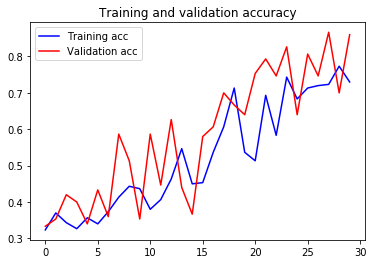

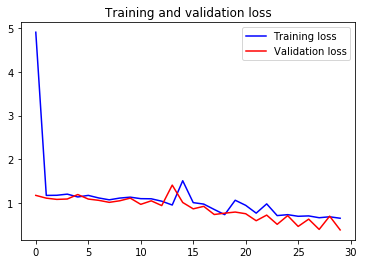

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Found 150 images belonging to 3 classes.
15/15 [==============================] - 87s 6s/step
No of errors = 21/150


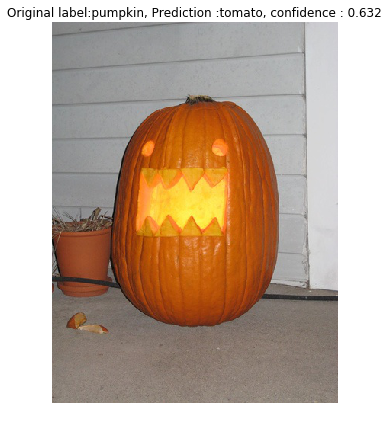

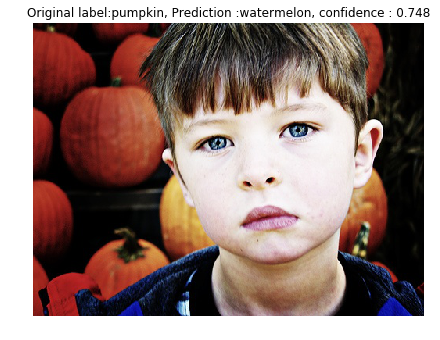

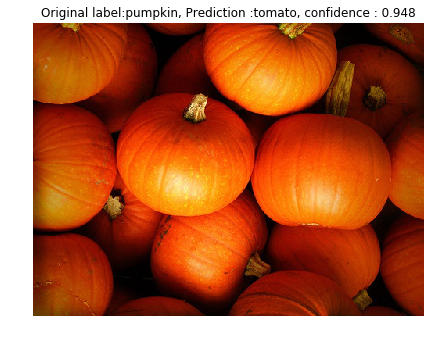

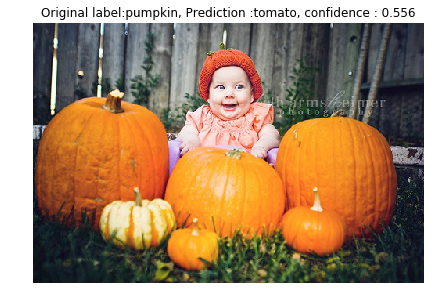

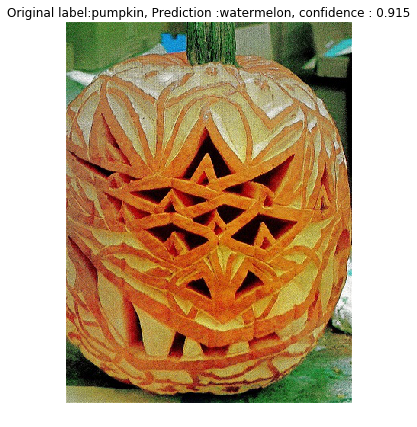

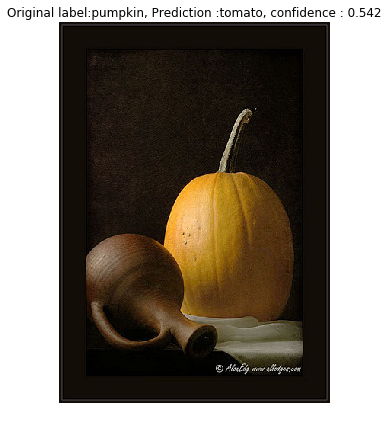

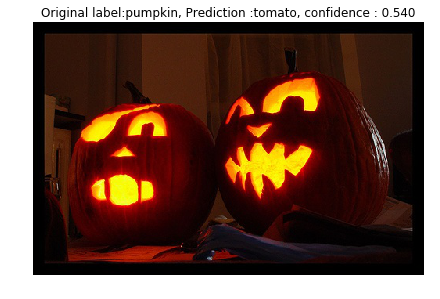

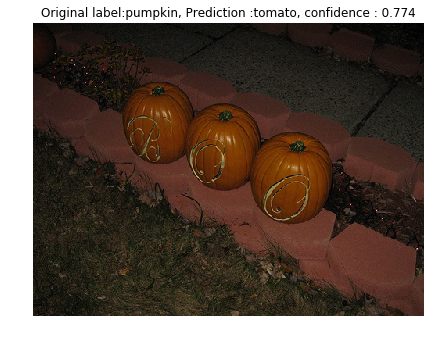

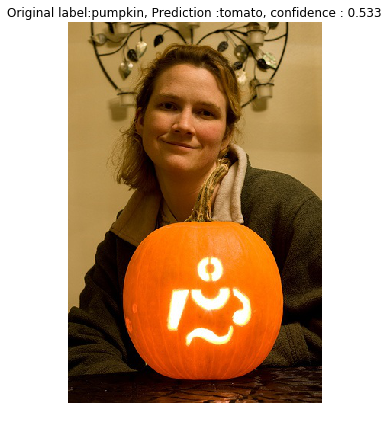

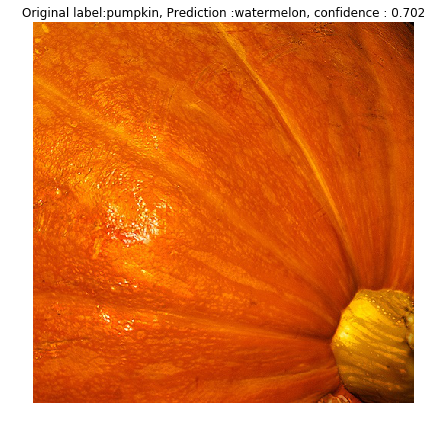

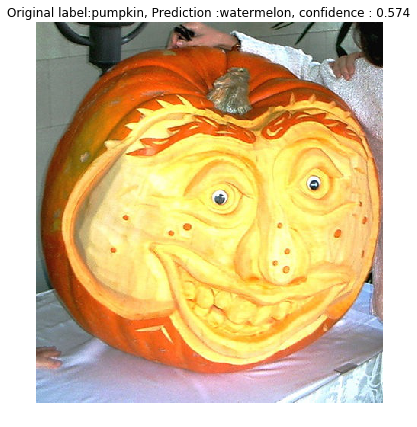

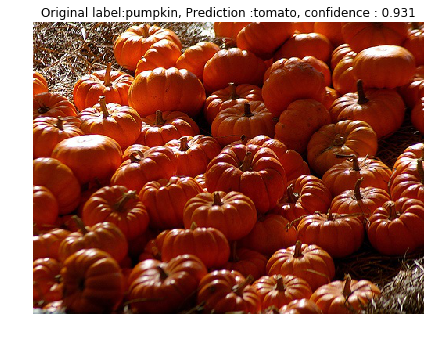

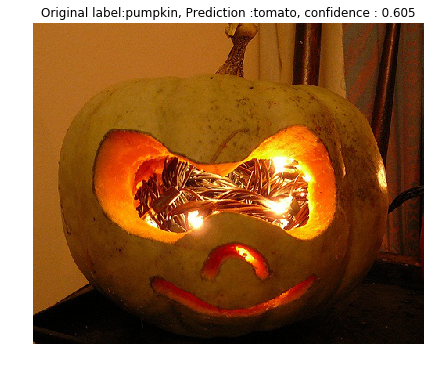

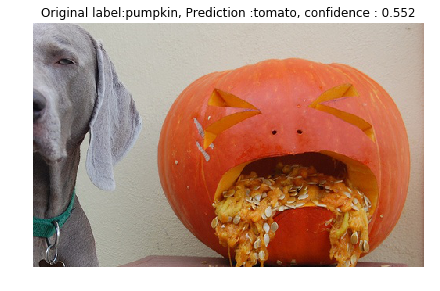

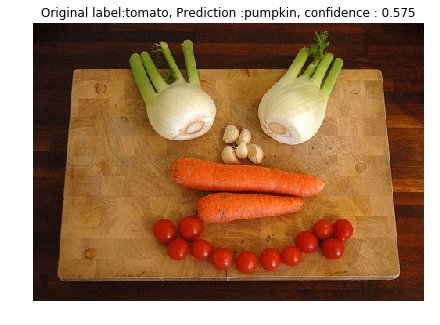

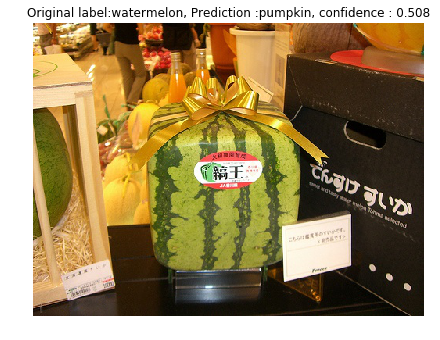

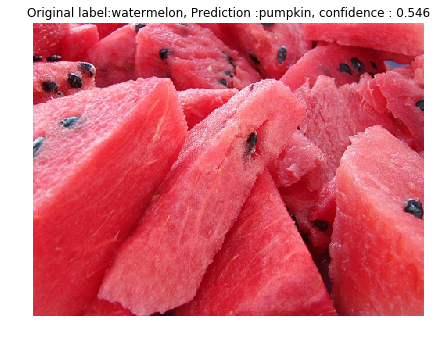

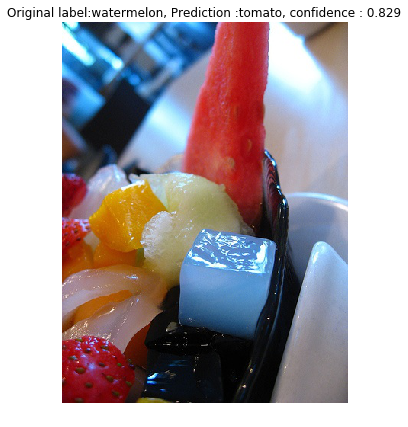

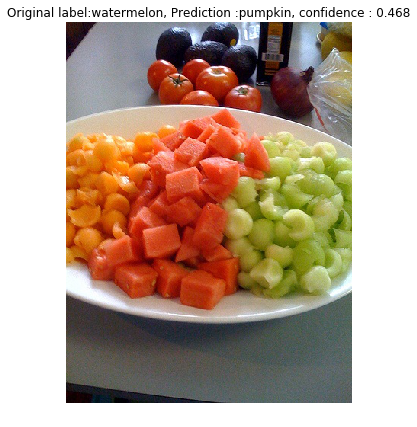

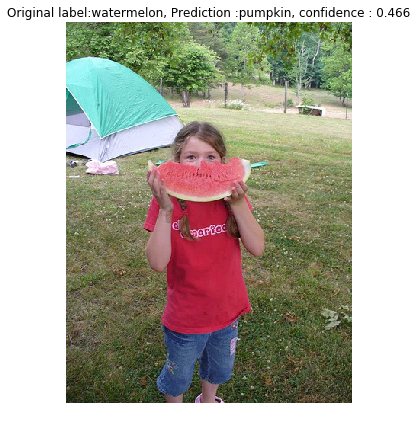

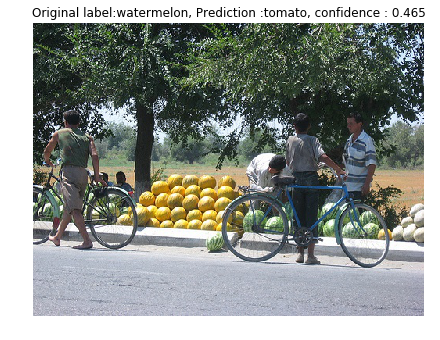

In [13]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()